# Learning outcomes
1. Gentle intro on CV
2. Recap on images as Numpy array
3. Image cropping
4. Splitting and merging of color channels
5. Points operators
    - elementary operations: addition, subtraction, multiplication and division
    - Gamma correction (non-linear technique)
6. Image blending (adding 2 images together)

In [2]:
import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img

## Recap on images as Numpy Array
There are two primary types of images: **grayscale** and **color**.

| grayscale | color |
| :-: | :-: |
| matrix (2D array) | 3D array |
| (h, w) | (h, w, channel) |

In [11]:
#Create a grayscale image

img = np.zeros((2,4), dtype=np.uint8)
img[0,1] = 1
img[1,2] = 1

print(img)

[[0 1 0 0]
 [0 0 1 0]]


In [12]:
#(2,4,3) = (h, w, channel)
#3 elements, 4 times, 2 row

img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [1 1 1]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  [0 0 0]]]


## Access elements in array

In [20]:
img = cv.imread("images/lena.jfif")

a = img[49, 219, 2]
b = img.item(49, 219, 2)
a == b

True

In [17]:
%timeit a = img[49, 219, 2]
%timeit b = img.item(49, 219, 2)

97.5 ns ± 3.21 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
78.3 ns ± 1.9 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Numpy slicing

In [21]:
h, w = img.shape[:2]
yc, xc = h // 2, w // 2
topleft = img[:yc, :xc]

show_img("topleft", topleft)

In [22]:
#central region of the image (60x60)
center = img[yc-30:yc+30, xc-30:xc+30]
show_img("center", center)

### Exercise 1: Create a white image

In [23]:
img = np.zeros((200,200), dtype=np.uint8) + 255
show_img("white", img)

### Exercise: Extract region of interest

In [8]:
##Use flower.jfif

img = cv.imread("images/flower.jfif")
show_img("dog", img)

## There are three ways to get the indices needed

In [2]:
[i for i in dir(cv) if i.startswith("EVENT")]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [11]:
#1st way

img = cv.imread("images/flower.jfif")
img_copy = img.copy()

def rect_region(event, x, y ,flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img, (x,y), 1, (0,0,255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()


(126, 72)
(184, 127)


In [12]:
flower = img_copy[38:126, 87:183]
show_img("flower", flower)

In [7]:
#2nd way
bbox = cv.selectROI("crop", img_copy)
flower = img_copy[int(bbox[1]): int(bbox[1] + bbox[3]),
                  int(bbox[0]): int(bbox[0] + bbox[2])]

show_img("flower", flower)

In [13]:
#3rd way: use microsoft paint to see the coordinates


## Exercise: simple wallpaper

In [15]:
img_arr = np.zeros((30,30), dtype=np.uint8)
img_arr[:10, 10:20] = 255
img_arr[10:20, :10] = 255
img_arr[10:20, 20:] = 255
img_arr[20:, 10:20] = 255

img = np.tile(img_arr, (3,3))

show_img("pattern", img)

## Image cropping
Why?
 - Remove unwanted object
 - Separate the image into a $3 \times 3$ grids. We move the camera in such a way that the object of interest lies on the gridlines or their intersection. As such, your image would look more aesthetically appealing.
 - one of the image augmentation methods for DL model training.

In [25]:
img = cv.imread("dog.jfif")
img_copy = img.copy()
h, w = img.shape[:2]

tiles = []
#user defined params
n_vertical_grids = 3
n_horizontal_grids = 3

M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
        
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)
            

In [27]:
show_img("patch", tiles[9])

## Splitting and merging color channels

In [29]:
img = cv.imread("images/lena.jfif")

(b,g,r) = cv.split(img)

img_merge = cv.merge((b,g,r))

np.array_equal(img, img_merge)

True

In [30]:
import matplotlib.pyplot as plt

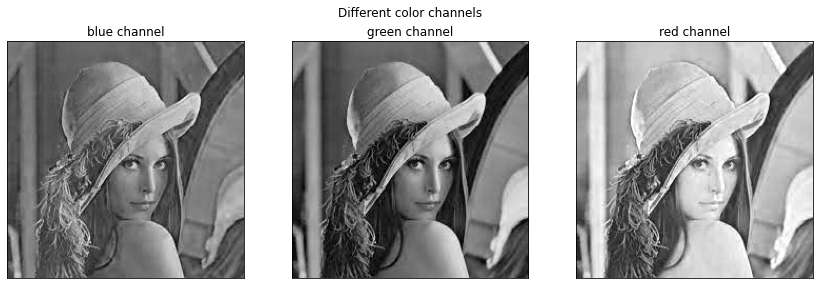

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("Different color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])

ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])

ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

## Exercise: R G B of dog.jfif

In [49]:
img = cv.imread("images/dog.jfif")
channels = cv.split(img)

colors = ("blue", "green", "red")

imgs = []

for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[..., i] = ch
    imgs.append(img_arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()


## Point operators
Elementary math operations: addition, subtraction, multiplication, division

$$f_{trans}(\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

In [50]:
np.uint8(np.array([-2, 0, 255, 300]))

array([254,   0, 255,  44], dtype=uint8)

In [52]:
def point_op(img, alpha, beta):
    """point operators of image. Arguments:
    1. Source image
    2. Multiplier
    3. Constant"""
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [53]:
img = cv.imread("images/bridge.jfif")

#increase the brightness and contrast
transform = point_op(img, 1.6, 20)

cv.imshow("Original", img)
show_img("transform", transform)

In [54]:
darken = point_op(img, 1, -80)
show_img("dark", darken)

## gamma correction
Technique to adjust brightness of image

$$O = (\frac{I}{255})^{\gamma} \times 255$$

In [2]:
gamma = 1/2.2

lookUpTable = np.empty((1, 256), dtype=np.uint8)

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("Original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gmma correction", res, adjust=True)

## Image blending (add two images)
```
cv.addWeighted(img1, alpha, img2, 1-alpha, beta)
```

$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [5]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.7

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("Lena", img)
cv.imshow("resized", img2)
show_img("image blending", res)

## Exercise 1

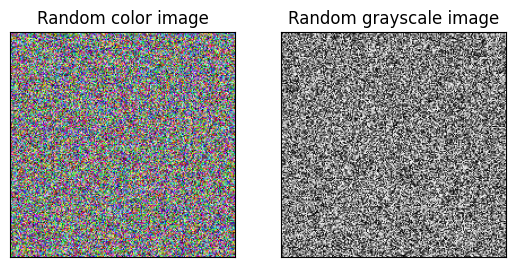

In [11]:
#color noise image
import numpy as np
import matplotlib.pyplot as plt
random_color_img = np.random.randint(0, high = 256, size=(200,200,3), dtype=np.uint8)
random_grayscale_img = np.random.randint(0, high = 256, size=(200,200), dtype=np.uint8)

plt.subplot(121)
plt.imshow(random_color_img)
plt.title("Random color image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(random_grayscale_img, cmap=plt.cm.gray)
plt.title("Random grayscale image")
plt.xticks([]), plt.yticks([])
plt.show()


## Exercise 2

In [49]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    '''
    1. Source image
    2,3. Num of patches along x and y axes
    4. color of the grid line
    '''
    img = cv.imread(img)
    img_copy = img.copy()
    height, width = img.shape[:2]
    
    tiles = []
    
    num_horizontal_patches = num_horizontal_grid
    num_vertical_patches = num_vertical_grid
    
    M = int(h / num_vertical_patches)
    N = int(w / num_horizontal_patches)

    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M

            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)

            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)

            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)

            else:
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    show_img("crop", img_copy)

In [51]:
crop_grid("dog.jfif", 5, 5, (0,3,0)) 

## Exercise 3

In [77]:
img = cv.imread("lena.jfif")
img2 = cv.imread("coins.jfif")

# resize img2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

for alpha in range(0, 101):
    alpha /= 100
    res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)
    cv.imshow("Image blending", res)
    cv.waitKey(10)

#wait for user to close the window
print("Finished transitioning")
cv.waitKey(0)
cv.destroyAllWindows()

Finished transitioning


## Exercise 4

In [37]:
img = cv.imread("travel_hd.jpg")
watermark_img = cv.imread("week4_watermark.png")

#resize image
img = cv.resize(img, None, fx=0.12, fy=0.12)
h, w = img.shape[:2]

#watermark_img = cv.resize(watermark_img, (w,h))
watermark_img = cv.resize(watermark_img, None, fx=0.3, fy=0.3)

position = (img.shape[1] - watermark_img.shape[1] - 10,
           img.shape[0] - watermark_img.shape[0] - 10)

#x_offset = 10
#y_offset = 10

#region of interest
ROI = img[position[1]:position[1] + watermark_img.shape[0],
         position[0]:position[0] + watermark_img.shape[1]]

watermark_gray = cv.cvtColor(watermark_img, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(watermark_gray, 10, 255, cv.THRESH_BINARY)

inverted_mask = cv.bitwise_not(mask)
base_image = cv.bitwise_and(ROI, ROI, mask=inverted_mask)

watermark_roi = cv.bitwise_or(watermark_img, base_image)

img[position[1]:position[1] + watermark_img.shape[0],
   position[0]:position[0] + watermark_img.shape[1]] = watermark_roi

show_img("Watermark image", img)